# Imports and reading data

In [1]:
import pandas as pd # data processing
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("ggplot")
pd.set_option('display.max_columns', 200)

In [2]:
# create dataframes
df_articles_original = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
df_customers_original = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
df_sample_original = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv")
df_transactions_original = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [4]:
df_articles = df_articles_original
df_customers = df_customers_original
df_sample = df_sample_original
df_transactions = df_transactions_original

# EDA

#### 1. Articles

In [84]:
df_articles.shape # nr of rows and columns

(105542, 25)

In [85]:
df_articles.head(20) # show first 20 rows

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [86]:
df_articles.dtypes # show column types in dataframe

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [87]:
df_articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


Observations:
- some columns seem to have entries with value -1
- 

In [111]:
df_articles['product_type_no'].value_counts()

product_type_no
272    11169
265    10362
252     9302
255     7904
254     4155
       ...  
525        1
514        1
351        1
349        1
483        1
Name: count, Length: 132, dtype: int64

In [114]:
# check for columns with 
for column in df_articles.columns:
    print(column + ": " + str(df_articles[column].isna().sum()))

article_id: 0
product_code: 0
prod_name: 0
product_type_no: 0
product_type_name: 0
product_group_name: 0
graphical_appearance_no: 0
graphical_appearance_name: 0
colour_group_code: 0
colour_group_name: 0
perceived_colour_value_id: 0
perceived_colour_value_name: 0
perceived_colour_master_id: 0
perceived_colour_master_name: 0
department_no: 0
department_name: 0
index_code: 0
index_name: 0
index_group_no: 0
index_group_name: 0
section_no: 0
section_name: 0
garment_group_no: 0
garment_group_name: 0
detail_desc: 416


Observation: only column *detail_desc* has empty entries, but they are only 416.

In [89]:
for column in df_articles.columns:
    print(column + ": " + str(df_articles[column].nunique()) + " unique values out of " + str(df_articles[column].shape[0]) + " entries")

article_id: 105542 unique values out of 105542 entries
product_code: 47224 unique values out of 105542 entries
prod_name: 45875 unique values out of 105542 entries
product_type_no: 132 unique values out of 105542 entries
product_type_name: 131 unique values out of 105542 entries
product_group_name: 19 unique values out of 105542 entries
graphical_appearance_no: 30 unique values out of 105542 entries
graphical_appearance_name: 30 unique values out of 105542 entries
colour_group_code: 50 unique values out of 105542 entries
colour_group_name: 50 unique values out of 105542 entries
perceived_colour_value_id: 8 unique values out of 105542 entries
perceived_colour_value_name: 8 unique values out of 105542 entries
perceived_colour_master_id: 20 unique values out of 105542 entries
perceived_colour_master_name: 20 unique values out of 105542 entries
department_no: 299 unique values out of 105542 entries
department_name: 250 unique values out of 105542 entries
index_code: 10 unique values out of

Observations:
- product codes are not unique, and there are more product codes than product names.
- there are only 131 unique product_type_names and there is one more product_type_no -> one product type has 2 no's?
- same amount of graphical_appearance_no and grapphical_appearance_name
- there are 299 unique department_no and 250 unique department_name -> 2 departments have the same number?
- one more unique section_no than there are unique section_names
- less unique detail descriptions than product_name's -> some products have the same description?

In [90]:
df_articles[["product_type_no", "product_type_name"]].query("product_type_no == -1").groupby(["product_type_no", "product_type_name"]).size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7db722da44f0>>

In [91]:
df_articles["detail_desc"].describe()

count                                105126
unique                                43404
top       T-shirt in printed cotton jersey.
freq                                    159
Name: detail_desc, dtype: object

In [92]:
# check if all article_id's are 9 integer strings
article_id_matches = df_articles["article_id"].apply(str).str.fullmatch("^[0-9]{9}$")
df_articles[~article_id_matches]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc


In [93]:
df_articles["product_type_no"].value_counts()

product_type_no
272    11169
265    10362
252     9302
255     7904
254     4155
       ...  
525        1
514        1
351        1
349        1
483        1
Name: count, Length: 132, dtype: int64

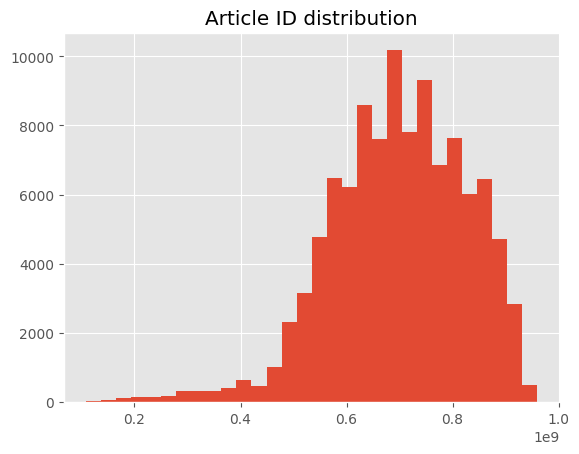

In [116]:
plt.hist(df_articles["article_id"], bins=30)
plt.title("Article ID distribution")
plt.savefig("Article ID distribution")
plt.show()

Skewed article ID distribution.

#### 2. Customers

In [95]:
df_customers.shape

(1371980, 7)

In [96]:
df_customers.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [8]:
# check for columns with NaNs
for column in df_customers.columns:
    print(column + ": " + str(df_customers[column].isna().sum()))

customer_id: 0
FN: 895050
Active: 907576
club_member_status: 6062
fashion_news_frequency: 16011
age: 15861
postal_code: 0


In [9]:
df_customers['FN'].describe()

count    476930.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: FN, dtype: float64

FN is either NaN or 1

In [118]:
df_customers['FN'].value_counts()

FN
1.0    476930
Name: count, dtype: int64

I will replace the NaN's in the FN column with zeros.

In [119]:
FN_with_zero = df_customers['FN'].fillna(0)
df_customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

Change FN column type to bool

In [120]:
FN_with_zero = FN_with_zero.astype('bool')
df_customers['FN'] = FN_with_zero
df_customers = df_customers.rename(columns={"FN": "want_fashion_news"})
df_customers.head()

,customer_id,want_fashion_news,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,False,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,False,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,False,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,False,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,True,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Check to see if conversion worked

In [121]:
df_customers['want_fashion_news'].value_counts()

want_fashion_news
False    895050
True     476930
Name: count, dtype: int64

In [122]:
df_customers['want_fashion_news'].dtype

dtype('bool')

In [5]:
df_customers['fashion_news_frequency'].value_counts()

fashion_news_frequency
NONE         877711
Regularly    477416
Monthly         842
Name: count, dtype: int64

In [7]:
df_customers.query('fashion_news_frequency == "Monthly"')

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5040,00f38d434368a5872c481d64d1f3b2289f3ed4d2cb5d99...,1.0,1.0,ACTIVE,Monthly,48.0,fed79dd607669cb0b9205ef909f87ec433f2c49a44f41b...
6412,01318a0ceef3dd69af82d134a96b6b00ee73693bf72cab...,1.0,1.0,ACTIVE,Monthly,34.0,e7d38730139c0bcbe836cb017cc0423b533b6db34c6807...
6523,0136c28ff3d96e5a5ef25cf5281114d80ab51fc89987eb...,1.0,1.0,ACTIVE,Monthly,34.0,991c917260c114d30d7c8ed76ac4306ef0c9f8d5205911...
6560,01387afda07032df0f33f86bdbd1b09df918241ef7db9b...,1.0,1.0,ACTIVE,Monthly,62.0,114f0d0069a2a2cccfe7b72e917d46412b33103c494742...
9771,01cecf8865bc39b0a7c8af386c2aa0cd7c3fc18d61f344...,1.0,1.0,ACTIVE,Monthly,27.0,f680358c8948524daef52657d1d6f791eb0e4b0e057290...
...,...,...,...,...,...,...,...
1366503,fef5935e8f60e59874ddc8692172b6ac0d61c6dc4241a6...,1.0,1.0,ACTIVE,Monthly,46.0,42f5025eb7aa591c5ae52dbbe2e3cbf6bab47e029a3848...
1366979,ff0c9eab0a7e15a3aa5d541dce7a5ab2bc947f69c8ff00...,1.0,1.0,ACTIVE,Monthly,30.0,5a1f05bfffbc43cf1f875a353cd7e2d8c8794fe2752d08...
1367297,ff1b951242dfefe9ff85631499c425d7ba7eb4e164a1ac...,1.0,1.0,ACTIVE,Monthly,30.0,6ab8da56290ff3d778e9d9e98dd0a0feedeb688664aa9c...
1370406,ffb3d2f2b9b3c371e91acdf8438a5306dc04989e7b6192...,1.0,1.0,ACTIVE,Monthly,26.0,0c264688d9d09cc4f8a797d068fd39bb066b8154f146d4...


In [ ]:
# correlation between 'want_fashion_news' and 'fashion_news_frequency'
# df_customers['want_fashion_news'].corr(df_customers['fashion_news_frequency'])

In [103]:
df_customers['age'].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

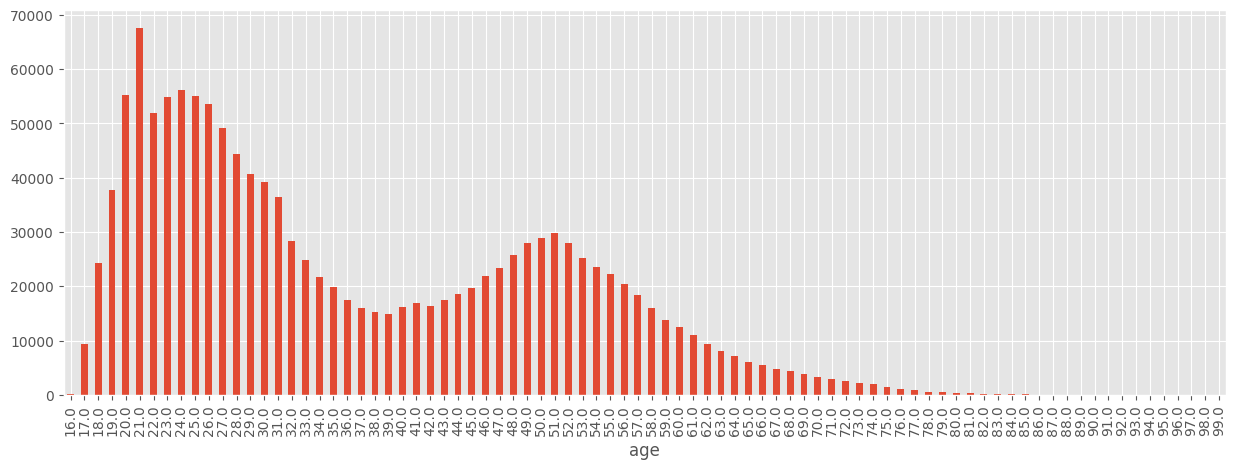

In [104]:
# plot age distribution
df_customers['age'].value_counts().sort_index().plot.bar(figsize=(15, 5))
plt.title("Customer age distribution")
plt.savefig("Customer age distribution")
plt.show()

Look at outliers above 80 years

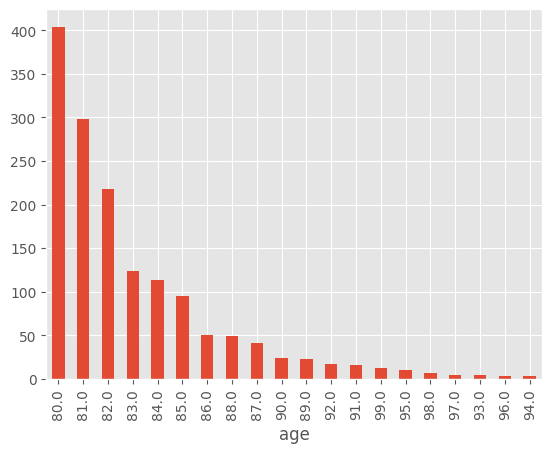

In [105]:
df_customers[df_customers['age'] >= 80]['age'].value_counts().plot.bar()
plt.show()

In [1]:
df_transactions.describe()

NameError: name 'df_transactions' is not defined